In [57]:
import csv,re
from textblob import TextBlob
import tweepy
import re
import pandas as pd
import matplotlib.pyplot as plt


consumer_key= "ennASdV55gqrbmVLxTon3furf"
consumer_secret= "v8GqFgbj9TLffgCLjE5r4fIiV2sIcKb68U7li8e1uVJb4R55Vu"
access_token= "1562124630651191296-lZBqOeK0R4DwIvmAIqKj10V7yFApJY"
access_token_secret= "sazY33olqA98GkHodxb8ucb74yd9BBw7wcrhvTZo58UeV"
auth= tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token= (access_token, access_token_secret)
api= tweepy.API(auth, wait_on_rate_limit=True)

In [58]:
def func():
    tweets = list(tweepy.Cursor(
        api.search, "{0}".format("COVID-19"), lang="en",tweet_mode='extended', count=13000).items(13000))
    Tweet_outpt = []
    for i in tweets:
        text = i.full_text
        place = ""
        if i.place:
            place = i.place.full_name
        json_output = {
            "tweet": text,
        }
        Tweet_outpt.append(json_output)
    return Tweet_outpt
final_arr=func()
df = pd.DataFrame(final_arr)
df

,tweet
0,RT @CreakyJoints: Here’s what you need to know...
1,RT @hongjeons: COVID-19 ALERT\nBE THE SUN MANI...
2,RT @writinguji: hello! just got tested today f...
3,RT @junhuihaee: #BeTSinMANILA — covid 19 posit...
4,RT @byuumie: #BeTSinMANILA — covid 19 positive...
...,...
12995,@AlveyChain @Naur_ALV It's really amazing!\nCa...
12996,RT @KatePri14608408: Helen has an autoimmune c...
12997,With growing COVID-19 infections reported on t...
12998,RT @hkfp: [Recap] 4 Hong Kong civil servants a...


In [59]:

def cleanTwt(twt):
  twt = re.sub('COVID-19','COVID-19',twt)
  twt = re.sub('COVID19','COVID19',twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt)
  twt = re.sub('@[^\s]+','',twt)
  twt = re.sub('RT','',twt)
  twt = re.sub('!','',twt)
  
  twt = ''.join([i if ord(i) < 128 else '' for i in twt])
  
  return twt




In [60]:
#cleaned tweets
df['cleaned tweets'] = df['tweet'].apply(cleanTwt)

df.head(100)

,tweet,cleaned tweets
0,RT @CreakyJoints: Here’s what you need to know...,Heres what you need to know about getting th...
1,RT @hongjeons: COVID-19 ALERT\nBE THE SUN MANI...,COVID-19 ALEBE THE SUN MANILAThread to be up...
2,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...
3,RT @junhuihaee: #BeTSinMANILA — covid 19 posit...,covid 19 positive cases (see thread if th...
4,RT @byuumie: #BeTSinMANILA — covid 19 positive...,covid 19 positive cases (see thread if th...
...,...,...
95,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...
96,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...
97,@Taffinexile1 @toadmeister Oooh do enlighten m...,"Oooh do enlighten me then. If ""severely rest..."
98,RT @hongjeons: COVID-19 ALERT\nBE THE SUN MANI...,COVID-19 ALEBE THE SUN MANILAThread to be up...


In [61]:

df.to_csv('tweets.csv')

In [62]:
#Text Blob (Data Labeling)

def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#creating two columns subjectivity and polarity

df['Subjectivity'] = df['cleaned tweets'].apply(getSubjectivity)
df['Polarity'] = df['cleaned tweets'].apply(getPolarity)

df.head(100)

,tweet,cleaned tweets,Subjectivity,Polarity
0,RT @CreakyJoints: Here’s what you need to know...,Heres what you need to know about getting th...,0.900000,0.500000
1,RT @hongjeons: COVID-19 ALERT\nBE THE SUN MANI...,COVID-19 ALEBE THE SUN MANILAThread to be up...,0.000000,0.000000
2,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...,0.311189,0.113636
3,RT @junhuihaee: #BeTSinMANILA — covid 19 posit...,covid 19 positive cases (see thread if th...,0.545455,0.227273
4,RT @byuumie: #BeTSinMANILA — covid 19 positive...,covid 19 positive cases (see thread if th...,0.545455,0.227273
...,...,...,...,...
95,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...,0.311189,0.113636
96,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...,0.311189,0.113636
97,@Taffinexile1 @toadmeister Oooh do enlighten m...,"Oooh do enlighten me then. If ""severely rest...",0.601389,0.187500
98,RT @hongjeons: COVID-19 ALERT\nBE THE SUN MANI...,COVID-19 ALEBE THE SUN MANILAThread to be up...,0.000000,0.000000


In [63]:
#creating a function for sentiment text

def getSentiment(score):
  if score < 0:
    return 0

  elif score == 0:
    return 2
  elif score > 0:
    return 1


In [64]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(10000)

,tweet,cleaned tweets,Subjectivity,Polarity,Sentiment
0,RT @CreakyJoints: Here’s what you need to know...,Heres what you need to know about getting th...,0.900000,0.500000,1
1,RT @hongjeons: COVID-19 ALERT\nBE THE SUN MANI...,COVID-19 ALEBE THE SUN MANILAThread to be up...,0.000000,0.000000,2
2,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...,0.311189,0.113636,1
3,RT @junhuihaee: #BeTSinMANILA — covid 19 posit...,covid 19 positive cases (see thread if th...,0.545455,0.227273,1
4,RT @byuumie: #BeTSinMANILA — covid 19 positive...,covid 19 positive cases (see thread if th...,0.545455,0.227273,1
...,...,...,...,...,...
9995,"For example, the stresses induced by the COVID...","For example, the stresses induced by the COVID...",0.133333,-0.066667,0
9996,"RT @FLSurgeonGen: Today, we released an analys...","Today, we released an analysis on COVID-19 m...",0.158333,0.125000,1
9997,"RT @FLSurgeonGen: Today, we released an analys...","Today, we released an analysis on COVID-19 m...",0.158333,0.125000,1
9998,RT @cbs_ke: The Nairobi Securities Exchange (N...,The Nairobi Securities Exchange (NSE) has re...,0.095833,-0.062500,0


In [65]:
tweets=pd.read_csv("tweets.csv")

In [66]:
#Data_Labeling
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
tweets["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets["tweet"]]
tweets["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets["tweet"]]
tweets["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets["tweet"]]
tweets['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in tweets["tweet"]]
tweets.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,tweet,cleaned tweets,Positive,Negative,Neutral,Compound
0,0,RT @CreakyJoints: Here’s what you need to know...,Heres what you need to know about getting th...,0.000,0.12,0.880,-0.3818
1,1,RT @hongjeons: COVID-19 ALERT\nBE THE SUN MANI...,COVID-19 ALEBE THE SUN MANILAThread to be up...,0.155,0.00,0.845,0.4466
2,2,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...,0.135,0.00,0.865,0.5983
3,3,RT @junhuihaee: #BeTSinMANILA — covid 19 posit...,covid 19 positive cases (see thread if th...,0.189,0.00,0.811,0.6351
4,4,RT @byuumie: #BeTSinMANILA — covid 19 positive...,covid 19 positive cases (see thread if th...,0.180,0.00,0.820,0.6351


In [67]:
score = tweets["Compound"].values
sentiment = []
for i in score:
    if i > 0 :
        sentiment.append('Positive')
    elif i < 0 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
tweets["Sentiment"] = sentiment
tweets.head(100)

,Unnamed: 0,tweet,cleaned tweets,Positive,Negative,Neutral,Compound,Sentiment
0,0,RT @CreakyJoints: Here’s what you need to know...,Heres what you need to know about getting th...,0.000,0.120,0.880,-0.3818,Negative
1,1,RT @hongjeons: COVID-19 ALERT\nBE THE SUN MANI...,COVID-19 ALEBE THE SUN MANILAThread to be up...,0.155,0.000,0.845,0.4466,Positive
2,2,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...,0.135,0.000,0.865,0.5983,Positive
3,3,RT @junhuihaee: #BeTSinMANILA — covid 19 posit...,covid 19 positive cases (see thread if th...,0.189,0.000,0.811,0.6351,Positive
4,4,RT @byuumie: #BeTSinMANILA — covid 19 positive...,covid 19 positive cases (see thread if th...,0.180,0.000,0.820,0.6351,Positive
...,...,...,...,...,...,...,...,...
95,95,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...,0.135,0.000,0.865,0.5983,Positive
96,96,RT @writinguji: hello! just got tested today f...,hello just got tested today for covid 19 and...,0.135,0.000,0.865,0.5983,Positive
97,97,@Taffinexile1 @toadmeister Oooh do enlighten m...,"Oooh do enlighten me then. If ""severely rest...",0.162,0.197,0.641,-0.2406,Negative
98,98,RT @hongjeons: COVID-19 ALERT\nBE THE SUN MANI...,COVID-19 ALEBE THE SUN MANILAThread to be up...,0.155,0.000,0.845,0.4466,Positive


In [68]:
print(tweets["Sentiment"].value_counts())

Positive    6421
Neutral     3632
Negative    2947
Name: Sentiment, dtype: int64


In [69]:
#Output_Labeling
tweets.to_csv("Labeled_Data.csv")


In [70]:
tweets.shape

(13000, 8)

In [71]:
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
#Splitting Data 
df=pd.DataFrame(tweets['cleaned tweets'])
split_data = df["cleaned tweets"].str.split(" ")
split_data

0        [, , Heres, what, you, need, to, know, about, ...
1        [, , COVID-19, ALEBE, THE, SUN, MANILAThread, ...
2        [, , hello, just, got, tested, today, for, cov...
3        [, , , , covid, 19, positive, cases, , (see, t...
4        [, , , , covid, 19, positive, cases, , (see, t...
                               ...                        
12995    [, , It's, really, amazingCause, of, COVID-19,...
12996    [, , Helen, has, an, autoimmune, condition, bu...
12997    [With, growing, COVID-19, infections, reported...
12998    [, , [Recap], 4, Hong, Kong, civil, servants, ...
12999    [, will, forever, be, known, as, a, media, out...
Name: cleaned tweets, Length: 13000, dtype: object

In [73]:
##Tokenization

data=split_data
s_new = []
def tokenization_s(data): 
    for sent in (data[:][2]): 
        s_token = sent_tokenize(sent)
        if s_token != '':
            s_new.append(s_token)
    return s_new

print(tokenization_s(data))

[[], [], ['hello'], ['just'], ['got'], ['tested'], ['today'], ['for'], ['covid'], ['19'], ['and'], ['it'], ['came'], ['out'], ['positive.'], ['I'], ['attended'], ['Be'], ['the'], ['Sun'], ['in'], ['Manila'], ['Day'], ['1'], ['at'], ['LBA'], ['Regular,'], ['2']]


In [74]:
#Tokenization

df1=pd.DataFrame(tweets['cleaned tweets'])
df1["Sentiment"]=tweets["Sentiment"]

In [75]:
df1['cleaned tweets'].dropna(inplace=True)
df1['cleaned tweets'] = df1['cleaned tweets'].astype(str)
df1.head(11000)

,cleaned tweets,Sentiment
0,Heres what you need to know about getting th...,Negative
1,COVID-19 ALEBE THE SUN MANILAThread to be up...,Positive
2,hello just got tested today for covid 19 and...,Positive
3,covid 19 positive cases (see thread if th...,Positive
4,covid 19 positive cases (see thread if th...,Positive
...,...,...
10995,Yankee Candle is warning consumers that if y...,Negative
10996,Why isnt she urgently messaging to mask to...,Positive
10997,Tissue-specific pathway activities: A retrosp...,Neutral
10998,More and more articles coming out every day ...,Positive


In [76]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 
df1['tokenization'] = df1.apply(lambda x: tokenize(x['cleaned tweets']), axis=1)
df1[['tokenization']].head(13000)

,tokenization
0,"[Heres, what, you, need, to, know, about, gett..."
1,"[ALEBE, THE, SUN, MANILAThread, to, be, update..."
2,"[hello, just, got, tested, today, for, covid, ..."
3,"[covid, positive, cases, see, thread, if, ther..."
4,"[covid, positive, cases, see, thread, if, ther..."
...,...
12995,"[It, really, amazingCause, of, I, wo, go]"
12996,"[Helen, has, an, autoimmune, condition, but, t..."
12997,"[With, growing, infections, reported, on, the,..."
12998,"[Recap, Hong, Kong, civil, servants, arrested,..."


In [77]:
#Stemming
from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer("english")
df1['stemming'] = df1['tokenization'].apply(lambda x: [stemmer.stem(y) for y in x])

In [78]:
df1

,cleaned tweets,Sentiment,tokenization,stemming
0,Heres what you need to know about getting th...,Negative,"[Heres, what, you, need, to, know, about, gett...","[here, what, you, need, to, know, about, get, ..."
1,COVID-19 ALEBE THE SUN MANILAThread to be up...,Positive,"[ALEBE, THE, SUN, MANILAThread, to, be, update...","[aleb, the, sun, manilathread, to, be, updat, ..."
2,hello just got tested today for covid 19 and...,Positive,"[hello, just, got, tested, today, for, covid, ...","[hello, just, got, test, today, for, covid, an..."
3,covid 19 positive cases (see thread if th...,Positive,"[covid, positive, cases, see, thread, if, ther...","[covid, posit, case, see, thread, if, there, a..."
4,covid 19 positive cases (see thread if th...,Positive,"[covid, positive, cases, see, thread, if, ther...","[covid, posit, case, see, thread, if, there, a..."
...,...,...,...,...
12995,"It's really amazingCause of COVID-19,I won't...",Positive,"[It, really, amazingCause, of, I, wo, go]","[it, realli, amazingcaus, of, i, wo, go]"
12996,Helen has an autoimmune condition but the co...,Neutral,"[Helen, has, an, autoimmune, condition, but, t...","[helen, has, an, autoimmun, condit, but, the, ..."
12997,With growing COVID-19 infections reported on t...,Positive,"[With, growing, infections, reported, on, the,...","[with, grow, infect, report, on, the, first, w..."
12998,[Recap] 4 Hong Kong civil servants arrested ...,Negative,"[Recap, Hong, Kong, civil, servants, arrested,...","[recap, hong, kong, civil, servant, arrest, fo..."


In [79]:
#Lemmatization
import nltk
nltk.download('omw-1.4')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df1['text_lemmatized'] = df1["cleaned tweets"].apply(lemmatize_text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [80]:
df1.head()

,cleaned tweets,Sentiment,tokenization,stemming,text_lemmatized
0,Heres what you need to know about getting th...,Negative,"[Heres, what, you, need, to, know, about, gett...","[here, what, you, need, to, know, about, get, ...","[Heres, what, you, need, to, know, about, gett..."
1,COVID-19 ALEBE THE SUN MANILAThread to be up...,Positive,"[ALEBE, THE, SUN, MANILAThread, to, be, update...","[aleb, the, sun, manilathread, to, be, updat, ...","[COVID-19, ALEBE, THE, SUN, MANILAThread, to, ..."
2,hello just got tested today for covid 19 and...,Positive,"[hello, just, got, tested, today, for, covid, ...","[hello, just, got, test, today, for, covid, an...","[hello, just, got, tested, today, for, covid, ..."
3,covid 19 positive cases (see thread if th...,Positive,"[covid, positive, cases, see, thread, if, ther...","[covid, posit, case, see, thread, if, there, a...","[covid, 19, positive, case, (see, thread, if, ..."
4,covid 19 positive cases (see thread if th...,Positive,"[covid, positive, cases, see, thread, if, ther...","[covid, posit, case, see, thread, if, there, a...","[covid, 19, positive, case, (see, thread, if, ..."


In [81]:
#stop words

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
filtered_word_list =tweets['cleaned tweets'] #make a copy of the word_list
for tweet in tweets: # iterate over word_list
  if tweet in stopwords.words('english'): 
    filtered_word_list.remove(word)


In [83]:
filtered_word_list


0          Heres what you need to know about getting th...
1          COVID-19 ALEBE THE SUN MANILAThread to be up...
2          hello just got tested today for covid 19 and...
3            covid 19 positive cases  (see thread if th...
4            covid 19 positive cases  (see thread if th...
                               ...                        
12995      It's really amazingCause of COVID-19,I won't...
12996      Helen has an autoimmune condition but the co...
12997    With growing COVID-19 infections reported on t...
12998      [Recap] 4 Hong Kong civil servants arrested ...
12999     will forever be known as a media outlet that ...
Name: cleaned tweets, Length: 13000, dtype: object

In [84]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer() 
vectorized = count_vectorize.fit_transform(df1["cleaned tweets"])

In [86]:
print(vectorized[0,:])

#print(vc.vocabulary_)
print(count_vectorize.get_feature_names_out())
print(count_vectorize.get_feature_names_out()[10000], vectorized[0,10000])

  (0, 4307)	1
  (0, 9759)	1
  (0, 9991)	1
  (0, 6059)	1
  (0, 9032)	1
  (0, 5103)	1
  (0, 544)	1
  (0, 3999)	1
  (0, 8901)	1
  (0, 5194)	1
  (0, 2418)	1
  (0, 135)	1
  (0, 1503)	1
  (0, 882)	1
  (0, 3774)	1
  (0, 8156)	1
  (0, 8956)	1
  (0, 3586)	1
['00' '000' '0000' ... 'zubair' 'zulu' 'zweli']
youre 0


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,df1["Sentiment"],test_size = 0.2, random_state =26105111)

In [97]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)

MultinomialNB()

In [99]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)

In [100]:
from sklearn import metrics
metrics.accuracy_score(res, y_test)

0.8507692307692307

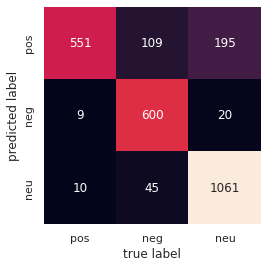

In [102]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [103]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)

BernoulliNB()

In [104]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)

In [105]:
res

array(['Negative', 'Neutral', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype='<U8')

Text(89.18, 0.5, 'predicted label')

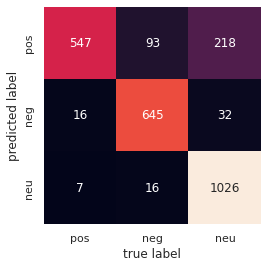

In [106]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [107]:
from sklearn import metrics
metrics.accuracy_score(res, y_test)

0.8530769230769231

In [108]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
logisticRegr.fit(vectorized, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [109]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=logisticRegr.predict(vectorized)

In [110]:
res

array(['Positive', 'Neutral', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [111]:
metrics.accuracy_score(res, y_test)

0.9338461538461539

Text(89.18, 0.5, 'predicted label')

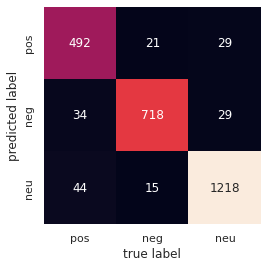

In [112]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [113]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [114]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)

In [115]:
metrics.accuracy_score(res, y_test)

0.9357692307692308

Text(89.18, 0.5, 'predicted label')

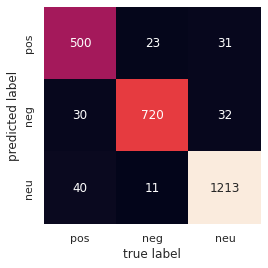

In [116]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [117]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [118]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)

In [119]:
metrics.accuracy_score(res, y_test)

0.8442307692307692

Text(89.18, 0.5, 'predicted label')

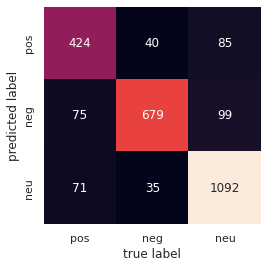

In [120]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [121]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)

RidgeClassifier()

In [122]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)


In [123]:
metrics.accuracy_score(res, y_test)

0.9276923076923077

Text(89.18, 0.5, 'predicted label')

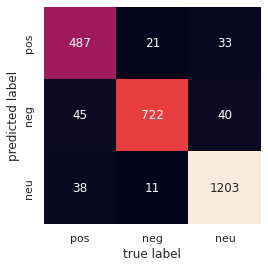

In [124]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [131]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(random_state=0)
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)

PassiveAggressiveClassifier(random_state=0)

In [132]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)


In [133]:
metrics.accuracy_score(res, y_test)

0.9323076923076923

Text(89.18, 0.5, 'predicted label')

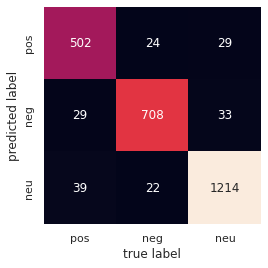

In [134]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [135]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)

Perceptron()

In [136]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)


In [137]:
metrics.accuracy_score(res, y_test)

0.9276923076923077

Text(89.18, 0.5, 'predicted label')

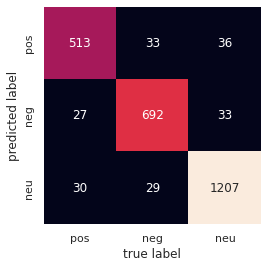

In [138]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')